In [1]:
import cfgrib
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from baselines.data_processor import DataProcessor
from baselines.linear_reg.simple_linear_regressor import SimpleLinearRegressor

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [2]:
processor = DataProcessor()
data, feature_list = DataProcessor.load_data()
s = 3
fh = 2

X, y = processor.preprocess(s, fh, use_neighbours=False)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

In [3]:
X.shape, y.shape

((4380, 32, 48, 3, 6), (4380, 32, 48, 2, 6))

In [ ]:
from time import time 
start = time()

available_reg = ['linear']
for reg in available_reg:
    print(f'<{reg.upper()}>')
    linearreg = SimpleLinearRegressor(X.shape, fh, feature_list, regressor_type=reg)
    linearreg.train(X_train, y_train)
    y_hat = linearreg.predict_and_evaluate(X_test, y_test, max_samples=1)
    print()
    
stop = time()
print('\n', stop-start, '[S]')

t2m => RMSE:  2.8646486330420524; MAE: 2.552940955321008; SE: 0.04045541470567846
sp => RMSE:  1.230459146744411; MAE: 0.9971009716757786; SE: 0.4322050807233812
tcc => RMSE:  0.2549433870596611; MAE: 0.2226560744773196; SE: 0.0054524552371001955
u10 => RMSE:  1.7071191699081758; MAE: 1.4329677385252582; SE: 0.020620181066224878
v10 => RMSE:  1.3125633795620826; MAE: 1.0190864014388243; SE: 0.047910577405469924
tp => RMSE:  0.0001912565825257214; MAE: 0.00010357443059511094; SE: 3.716405142563941e-06


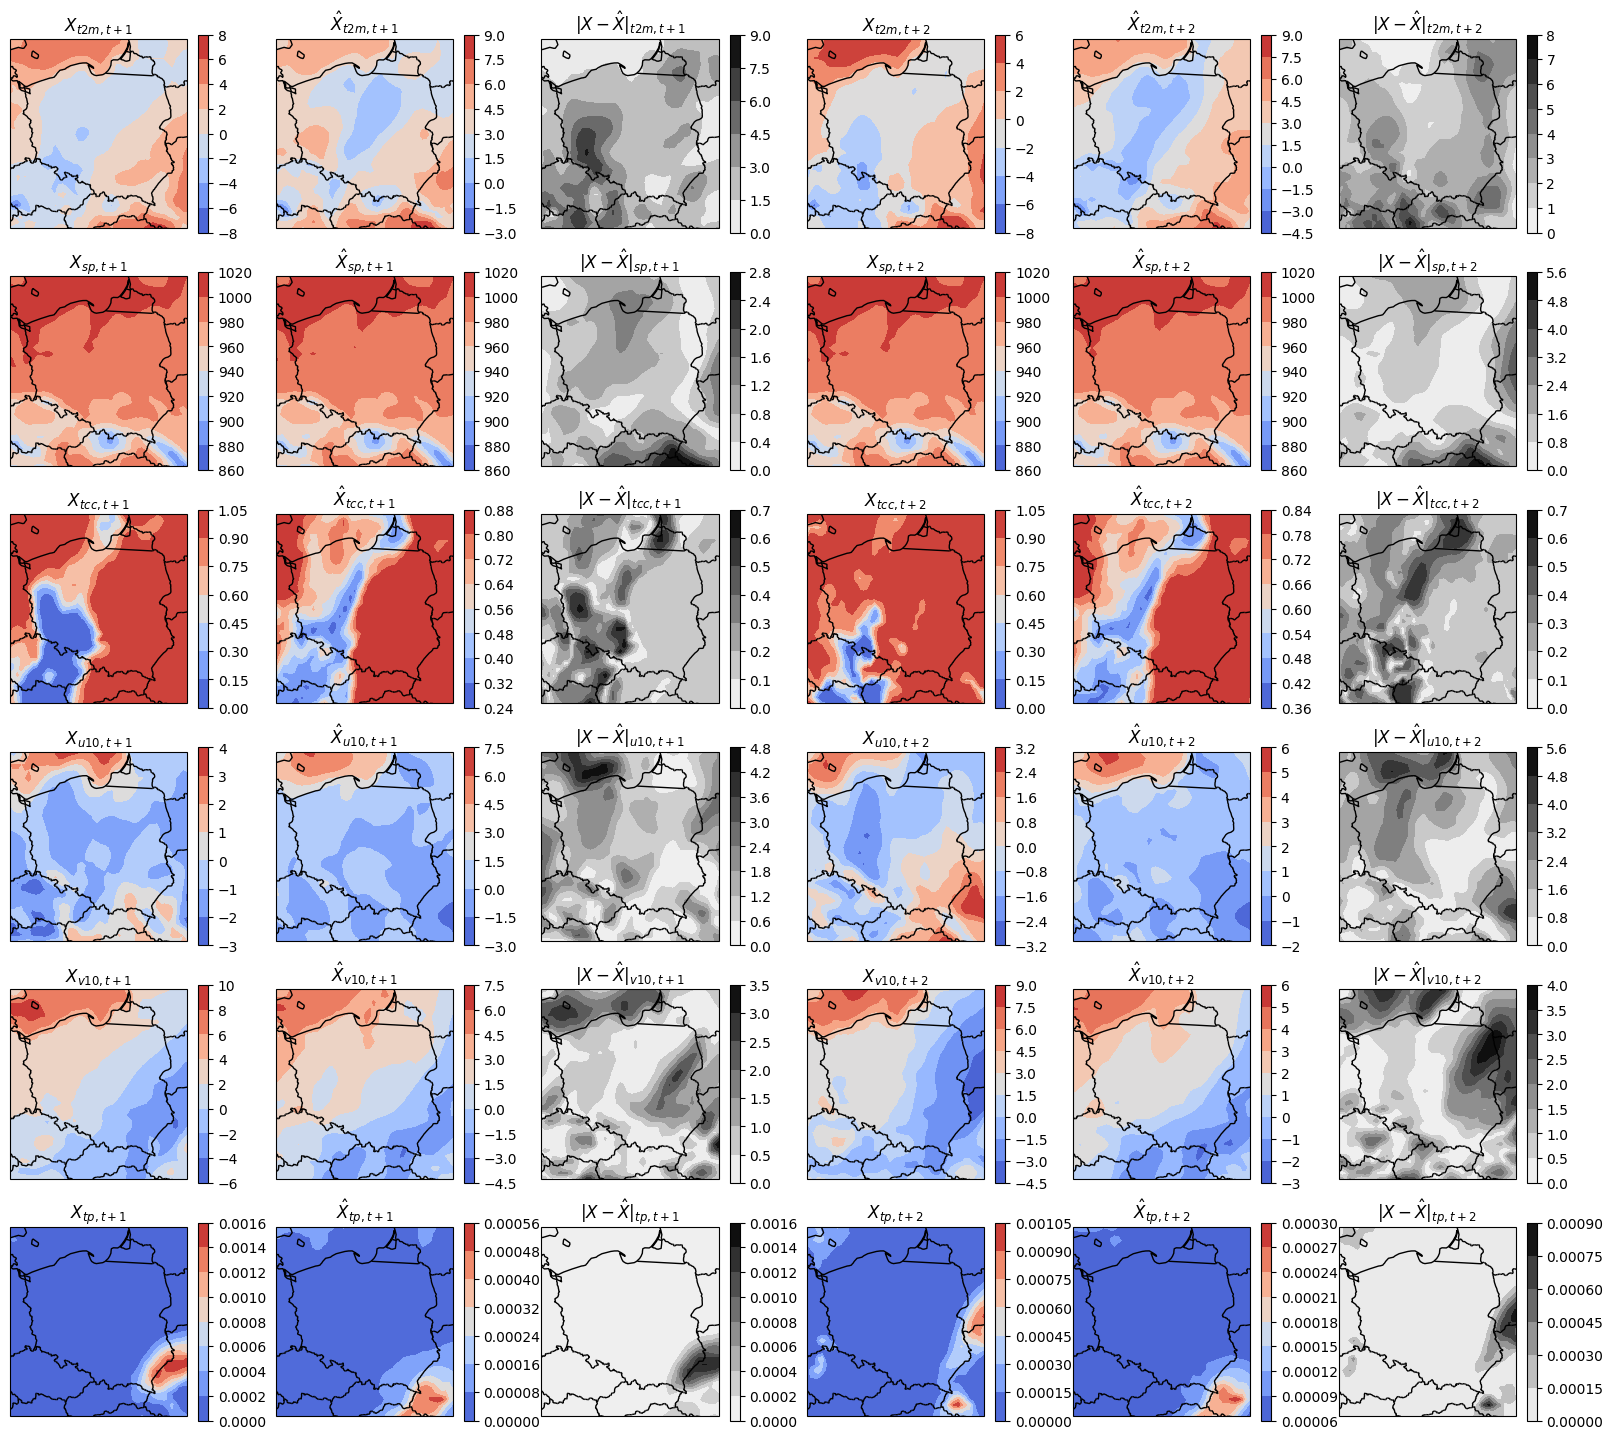


 66.0127580165863 [S]


In [5]:
start = time()
linearreg.plot_predictions(y_hat, y_test, 1, pretty=True)
stop = time()
print('\n', stop-start, '[S]')

In [6]:
# WITHOUT NEIGHBOURS

# =======================================
# Evaluation metrics for entire test set:
# =======================================
# t2m => RMSE: 3.03; SE: 0.004622528557599638
# tcc => RMSE: 2.557; SE: 0.011650039652808765
# u10 => RMSE: 0.315; SE: 0.00020160681976281122
# v10 => RMSE: 1.901; SE: 0.00173407108057958
# tp => RMSE: 1.867; SE: 0.0014322600082531719
# sp => RMSE: 0.0; SE: 1.5908941072379268e-07


#  21.97545576095581 [S]


# WITH NEIGHBOURS
# =======================================
# Evaluation metrics for entire test set:
# =======================================
# t2m => RMSE: 3.001; SE: 0.004622528557599641
# tcc => RMSE: 2.518; SE: 0.011650039652808775
# u10 => RMSE: 0.311; SE: 0.0002016068197628113
# v10 => RMSE: 1.866; SE: 0.001734071080579581
# tp => RMSE: 1.83; SE: 0.0014322600082531708
# sp => RMSE: 0.0; SE: 1.5908941072379268e-07


#  160.1185700893402 [S]